# Support Vector Regression

**SVM regressor or SVR is a ML algorithm used for regression analysis.**

It's different from Linear Regression method as it finds a hyperplane that best fits the data points in a contnuous space, instead of fitting a line to the data points.

# Key Terms

## Hyperplane

A hyperplane is a subspace that has one less dimension than that of its surrounding space. For example, with a two-dimensional space, the hyperplane will be one dimensional (i.e. a line). For a three-dimensional space, the hyperplane will be two-dimensional (i.e. a plane).

## Kernel

A kernel is a set of mathematical functions. This kernel function takes data as input and transforms it into the form required by the output. A few examples of kernels used in SVM are linear and radial basis function (RBF) kernels.

## Parametric

Parametric models have a finite number of parameters; however, non-parametric models have an infinite number of parameters. So for a parametric model, the complexity of the model doesn’t grow with the number of training data points.

However, in the case of non-parametric models, the complexity of the model grows with the number of training data points. Linear regression, logistic regression, and linear SVMs are parametric models; however decision trees (the depth of the tree changes as the training data changes), random forests, and SVMs with radial basis function kernels are non-parametric.

# Support Vector Regression in Python

## 1. Importing necessary libraries

First, let us import some essential Python libraries.

In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing the data set

In [2]:
# Reading the data

dataset = pd.read_csv('Student_Marks.csv')
dataset.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


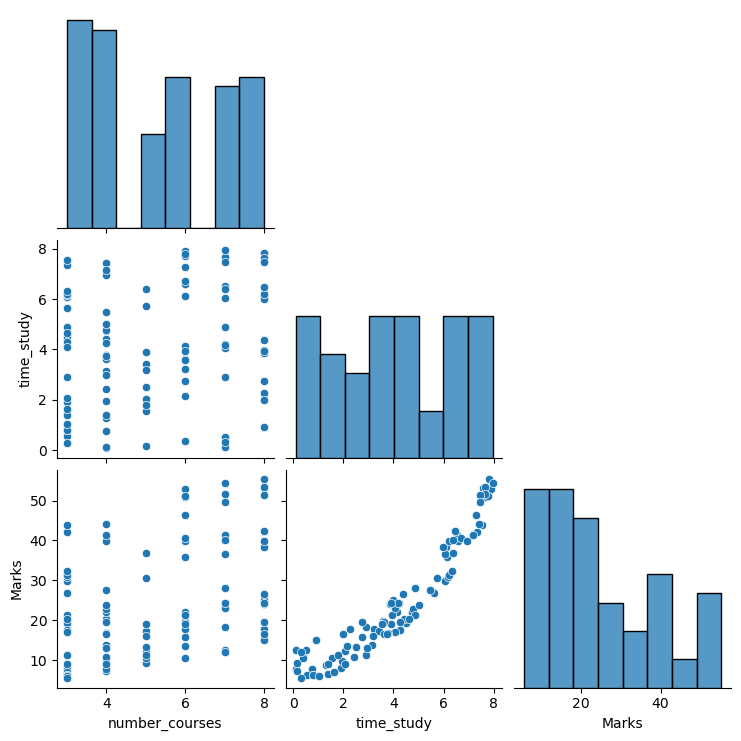

In [34]:
sns.pairplot(dataset, corner=True)

In [35]:
dataset.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


## 3. Separating the features and the target variable

In [54]:
X = dataset[['time_study']]
y = dataset['Marks']

## 4. Splitting the data into a train set and a test set

In [55]:
# Splitting the dataset into training and testing set (80/20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 5. Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [57]:
X_train_scaled

array([[-0.41235382],
       [-0.88339102],
       [-1.43293443],
       [-0.1246392 ],
       [ 0.02685655],
       [ 0.15925619],
       [-1.58909811],
       [-1.5207765 ],
       [ 0.97105274],
       [ 0.31754167],
       [-1.46900484],
       [ 0.37949791],
       [ 0.98293476],
       [-1.58230839],
       [ 1.09751138],
       [-0.28589518],
       [ 0.67400225],
       [-0.73953371],
       [ 1.55242299],
       [ 0.77839428],
       [ 0.01200402],
       [ 0.08414486],
       [-0.2001749 ],
       [-0.13736994],
       [ 0.20933042],
       [ 0.03916292],
       [-0.68861077],
       [-1.05143673],
       [-0.11827383],
       [ 0.1651972 ],
       [-0.10596746],
       [ 1.70773795],
       [ 0.93158746],
       [ 1.12382157],
       [ 0.22290987],
       [ 1.51338206],
       [ 0.92437338],
       [-1.59334169],
       [-0.38986285],
       [ 1.05719738],
       [ 1.59401005],
       [ 1.03979871],
       [ 1.57279216],
       [-0.98778305],
       [ 1.1959624 ],
       [-1

In [58]:
X_test_scaled

array([[-0.74387767],
       [ 0.54202051],
       [-0.50085554],
       [-1.25607274],
       [-1.30431647],
       [ 1.32023239],
       [-1.2605815 ],
       [ 1.40229181],
       [ 1.12996274],
       [-0.15277931],
       [ 1.29137633],
       [-0.44314342],
       [-1.45085115],
       [ 0.7877479 ],
       [-0.29976487],
       [ 1.33646392],
       [ 0.69080957],
       [ 0.51316445],
       [-0.28353334],
       [-1.31829362]])

In [59]:
# Converting back to dataframe

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_df

,time_study
0,-0.412354
1,-0.883391
2,-1.432934
3,-0.124639
4,0.026857
...,...
75,-1.488950
76,-0.579975
77,-0.414476
78,0.484739


In [60]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test_df

,time_study
0,-0.743878
1,0.542021
2,-0.500856
3,-1.256073
4,-1.304316
5,1.320232
6,-1.260582
7,1.402292
8,1.129963
9,-0.152779


## 6. Fitting the model to the training set

In [61]:
# Initializing the SVR models 
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_df, y_train)
svr_rbf.fit(X_train_df, y_train)
svr_poly.fit(X_train_df, y_train)

SVR(kernel='poly')

## 7. Calculating the loss after training

Let us now calculate the loss between the actual target values in the testing set and the values predicted by the model with the use of a cost function called the Root Mean Square Error (RMSE).

In [62]:
# Predicting the target values of the test set

y_pred_SVR_lin = svr_lin.predict(X_test_df)
y_pred_SVR_rbf = svr_rbf.predict(X_test_df)
y_pred_SVR_poly = svr_poly.predict(X_test_df)

In [63]:
y_pred_SVR_lin[:5]

array([13.54031102, 27.82262523, 16.23952819,  7.8514229 ,  7.31558572])

In [64]:
# RMSE (Root Mean Square Error)
rmse_SVR_lin = float(format(np.sqrt(mean_squared_error(y_test, y_pred_SVR_lin)), '.3f'))
print("\nRMSE for SVR_lin Model: ", rmse_SVR_lin)

rmse_SVR_rbf = float(format(np.sqrt(mean_squared_error(y_test, y_pred_SVR_rbf)), '.3f'))
print("\nRMSE for SVR_rbf Model: ", rmse_SVR_rbf)

rmse_SVR_poly = float(format(np.sqrt(mean_squared_error(y_test, y_pred_SVR_poly)), '.3f'))
print("\nRMSE for SVR_poly Model: ", rmse_SVR_poly)


RMSE for SVR_lin Model:  9.006

RMSE for SVR_rbf Model:  10.222

RMSE for SVR_poly Model:  9.521


In [ ]:
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)

In [36]:
dataset1 = dataset.copy()

In [39]:
dataset1.shape

(100, 3)

In [40]:
X_train.shape

(80, 2)

In [67]:
X_test

,time_study
83,3.197
53,6.049
70,3.736
45,2.061
44,1.954
39,7.775
22,2.051
80,7.957
10,7.353
0,4.508


In [68]:
X_test1 = X_test.copy()

In [69]:
y_test.shape

(20,)

In [70]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####

X_test1['Marks'] = y_test
X_test1['linear_svr_pred'] = y_pred_SVR_lin
X_test1['rbf_svr_pred'] = y_pred_SVR_rbf
X_test1['poly_svr_pred'] = y_pred_SVR_poly

X_test1

,time_study,Marks,linear_svr_pred,rbf_svr_pred,poly_svr_pred
83,3.197,16.106,13.540311,13.631788,19.994180
53,6.049,36.653,27.822625,25.625215,23.669504
70,3.736,16.606,16.239528,15.458797,21.835396
45,2.061,8.924,7.851423,11.550400,9.885617
44,1.954,9.742,7.315586,11.563306,8.358308
39,7.775,51.142,36.466130,34.947061,37.459682
22,2.051,12.209,7.801345,11.549838,9.747729
80,7.957,54.321,37.377554,35.297299,40.397510
10,7.353,42.036,34.352828,33.448956,31.932983
0,4.508,19.202,20.105568,18.266214,22.621345


Text(0, 0.5, 'Marks')

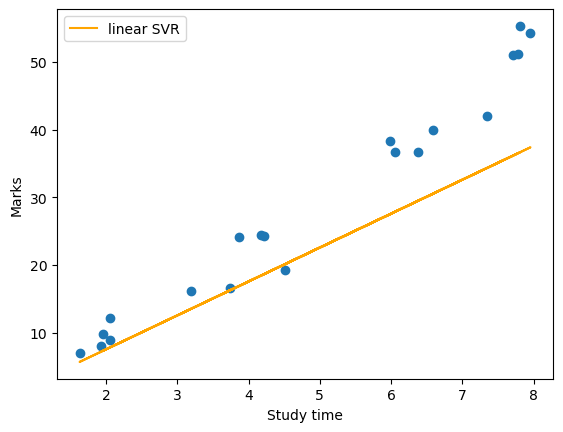

In [75]:
#### Visualization ####
plt.scatter(X_test1['time_study'], X_test1['Marks'])
plt.plot(X_test1['time_study'], X_test1['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

Text(0, 0.5, 'Marks')

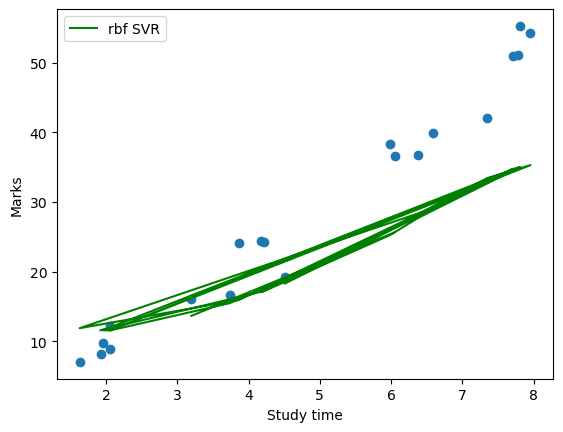

In [76]:
#### Visualization ####
plt.scatter(X_test1['time_study'], X_test1['Marks'])

plt.plot(X_test1['time_study'], X_test1['rbf_svr_pred'], color = 'green', label = 'rbf SVR')

plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

Text(0, 0.5, 'Marks')

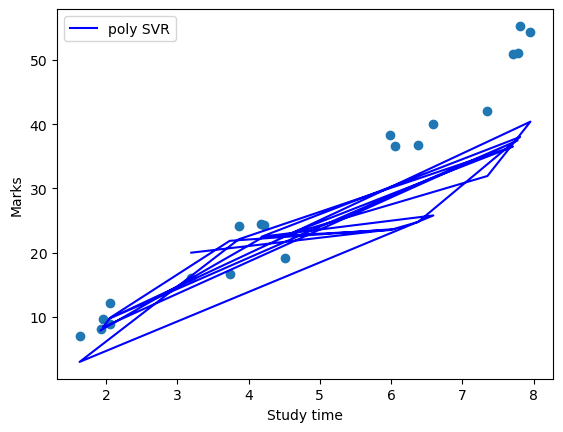

In [77]:
#### Visualization ####
plt.scatter(X_test1['time_study'], X_test1['Marks'])
plt.plot(X_test1['time_study'], X_test1['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')